In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

import findspark
findspark.init()

# Import and start a Spark session.
from pyspark.sql import *
from pyspark.sql.functions import *

spark = SparkSession.builder.getOrCreate()

In this notebook we expose our current exploratory work on the `#balancetonporc` dataset. Here the tweets are extracted for the month of October.

In [4]:
tweets = spark.read.parquet('sample_balancetonporc_10.parquet')

In [5]:
tweets.count()

2569

In [12]:
timestamps = tweets.select(col('timestamp_ms'))
timestamps_pd = timestamps.toPandas()

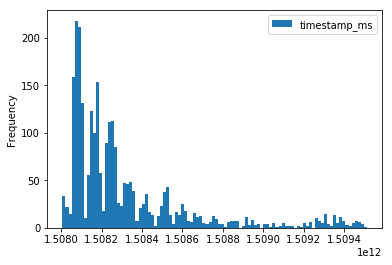

In [13]:
timestamps_pd.plot.hist(bins=100)

On the above plot we can see several peak. These huge decrease can be explained by two reasons:
- `#balancetonporc` was localized in France, so on one timezone
- During the nights a person is less likely to tweet

However, we can see what seems like a power law: at first the number of tweets is high and then decrease progressively. It might also be interesting to extract the data for the month of september.

We are also thinking of analyzing other metrics:
- Number of retweets and likes according to the time
- "Profile" of the person twitting. Is there someone with a huge number of followers who tweeted right before a peak?
- Geographicall progression of the activity. Has the activity started on a specific place and then spread to other part of France? Or was the starting point distributed in the country?